In [0]:
import json

def read_json(filename): 
  f = open (filename, "r") 
    
  # Reading from file 
  data = json.loads(f.read()) 
  return data

data = read_json("data.json")  

In [55]:
print(data)

{'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 9, 0, 9, 0, 0, 9, 9, 0, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 9, 0, 0, 9, 9, 0, 9, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}, {'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 9, 9, 9, 0, 0, 9, 9, 0, 0, 0, 0], [0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0], [0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 9, 

In [56]:
print(len(data['train']))
print(len(data['test']))

3
1


In [0]:

import numpy as np

train_input = np.zeros(shape=[12,13,13,1])
train_output = np.zeros(shape=[12,13,13,1])

test_input = np.zeros(shape=[1,13,13,1])
test_output = np.zeros(shape=[1,13,13,1])

for i in range(3):
  v = data['train'][i]
  inp = v['input']
  out = v['output']
  # print(np.array(inp).shape)
  train_input[i,:np.array(inp).shape[0],:,0] = inp
  train_output[i,:np.array(inp).shape[0],:,0] = out
  train_input[i+3] = train_input[i,::-1]
  train_input[i+6] = train_input[i,:,::-1]
  train_input[i+9] = train_input[i,::-1,::-1]
  train_output[i+3] = train_output[i,::-1]
  train_output[i+6] = train_output[i,:,::-1]
  train_output[i+9] = train_output[i,::-1,::-1]

for i in range(1):
  v = data['test'][i]
  inp = v['input']
  out = v['output']
  # print(np.array(inp).shape)
  test_input[i,:np.array(inp).shape[0],:,0] = inp
  test_output[i,:np.array(inp).shape[0],:,0] = out


In [58]:
print(test_input.shape)

(1, 13, 13, 1)


In [59]:
print(train_input.shape)

(12, 13, 13, 1)


In [0]:
train_input/=9.0
train_output/=9.0
test_input/=9.0
test_output/=9.0

# train_input-=0.5
# train_output-=0.5
# test_input-=0.5
# test_output-=0.5

# train_input*=2.0
# train_output*=2.0
# test_input*=2.0
# test_output*=2.0


In [0]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
from torch.utils import data
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

In [0]:
tensor_train_input = torch.Tensor(train_input)
tensor_train_output = torch.Tensor(train_output)

tensor_test_input = torch.Tensor(test_input)
tensor_test_output = torch.Tensor(test_output)

tensor_train_input = tensor_train_input.permute(0,3,1,2)
tensor_train_output = tensor_train_output.permute(0,3,1,2)
tensor_test_input = tensor_test_input.permute(0,3,1,2)
tensor_test_output = tensor_test_output.permute(0,3,1,2)

In [0]:
from torch.utils import data
import PIL

trainset = data.TensorDataset(tensor_train_input,tensor_train_output)
valset = data.TensorDataset(tensor_test_input,tensor_test_output)
batch_size = 3
num_workers = 1
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=num_workers)


In [0]:
import math

import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F


def hard_sigmoid(x):
    return torch.min(torch.max(x, torch.zeros_like(x)), torch.ones_like(x))


class _L0Norm(nn.Module):

    def __init__(self, origin, loc_mean=0, loc_sdev=0.01, beta=2 / 3, gamma=-0.1,
                 zeta=1.1, fix_temp=True):
        """
        Base class of layers using L0 Norm
        :param origin: original layer such as nn.Linear(..), nn.Conv2d(..)
        :param loc_mean: mean of the normal distribution which generates initial location parameters
        :param loc_sdev: standard deviation of the normal distribution which generates initial location parameters
        :param beta: initial temperature parameter
        :param gamma: lower bound of "stretched" s
        :param zeta: upper bound of "stretched" s
        :param fix_temp: True if temperature is fixed
        """
        super(_L0Norm, self).__init__()
        self._origin = origin
        self._size = self._origin.weight.size()
        self.loc = nn.Parameter(torch.zeros(self._size).normal_(loc_mean, loc_sdev))
        self.temp = beta if fix_temp else nn.Parameter(torch.zeros(1).fill_(beta))
        self.register_buffer("uniform", torch.zeros(self._size))
        self.gamma = gamma
        self.zeta = zeta
        self.gamma_zeta_ratio = math.log(-gamma / zeta)

    def _get_mask(self):
        if self.training:
            self.uniform.uniform_()
            u = Variable(self.uniform)
            s = F.sigmoid((torch.log(u) - torch.log(1 - u) + self.loc) / self.temp)
            s = s * (self.zeta - self.gamma) + self.gamma
            penalty = F.sigmoid(self.loc - self.temp * self.gamma_zeta_ratio).sum()
        else:
            s = F.sigmoid(self.loc) * (self.zeta - self.gamma) + self.gamma
            penalty = 0
        return hard_sigmoid(s), penalty


class L0Linear(_L0Norm):
    def __init__(self, in_features, out_features, bias=True, **kwargs):
        super(L0Linear, self).__init__(nn.Linear(in_features, out_features, bias=bias), **kwargs)

    def forward(self, input):
        mask, penalty = self._get_mask()
        return F.linear(input, self._origin.weight * mask, self._origin.bias), penalty


class L0Conv2d(_L0Norm):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True,
                 **kwargs):
        super(L0Conv2d, self).__init__(nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding,
                                                 dilation=dilation, groups=groups, bias=bias), **kwargs)

    def forward(self, input):
        mask, penalty = self._get_mask()
        conv = F.conv2d(input, self._origin.weight * mask, self._origin.bias, stride=self._origin.stride,
                        padding=self._origin.padding, dilation=self._origin.dilation, groups=self._origin.groups)
        return conv, penalty


class L0Sequential(nn.Sequential):
    def forward(self, input):
        penalty = 0
        for module in self._modules.values():
            output = module(input)
            if isinstance(output, tuple):
                input = output[0]
                penalty += output[1]
            else:
                input = output
        return input, penalty

In [0]:
class Replication(nn.Module):
  def __init__(self):
    super(Replication, self).__init__()
    # x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
    # self.w = torch.empty(289, 25)
    # nn.init.sparse_(self.w, sparsity=1/289)
    # self.b = torch.empty(25)
    # nn.init.zeros_(self.b)
    # self.conv0 = nn.Conv2d(1, 1, 5, stride=6, padding=0)
    self.conv1 = nn.Conv2d(1, 2, 5, stride=6, padding=0)
    self.conv2 = nn.ConvTranspose2d(2, 4, 5, stride=6, padding=0)
    self.conv11 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    self.conv12 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    self.conv13 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    self.conv14 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    # self.conv3 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    # self.conv4 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    # self.conv5 = nn.ConvTranspose2d(1, 1, 5, stride=1, padding=2)
    # self.conv6 = nn.ConvTranspose2d(1, 1, 5, stride=1, padding=2)
    # self.conv7 = nn.ConvTranspose2d(1, 1, 5, stride=1, padding=2)
    # self.conv8 = nn.ConvTranspose2d(1, 1, 5, stride=1, padding=2)
    # self.conv1 = nn.ConvTranspose2d(1, 1, 5, stride=1, padding=2)
    # self.fc1 = nn.Linear(17*17, 3*3)
    # self.fc2 = nn.Linear(3*3, 17*17)

    self.dropout = nn.Dropout(0.1)
    # self.fc1 = nn.Linear(3*6, 3*3)
    # self.fc1 = nn.Linear(17*17, 17*17)
    # self.fc2 = nn.Linear(17*17, 17*17)
    # self.fc3 = nn.Linear(17*17, 5*5)
    # self.fc4 = nn.Linear(5*5, 17*17)
    # self.fc4 = L0Linear(5*5, 17*17)
    # self.fc4 = L0Linear(17*17, 17*17)
    # self.fc1.weight.data.uniform_(0.0, 1.0)
    # self.fc1.weight.data = torch.round(self.fc1.weight.data)
    # self.fc1.bias.data.fill_(0)
    # self.fc1.weight.data.normal_(0.0,1/289)
    # self.fc1.weight.data.type(torch.int)
    # self.fc1.bias.data.type(torch.int)
    # fc1.weight.data.fill_(0.01)
    
    # self.conv1 = nn.Conv2d(1, 1, 5, stride=1, padding=2)
    # self.conv2 = nn.Conv2d(1, 1, 3, stride=1, padding=1)
    # self.conv3 = nn.Conv2d(1, 1, 3, stride=1, padding=1)
    # self.conv4 = nn.Conv2d(1, 1, 3, stride=1, padding=1)
    

  def forward(self, x):
    # x = x.view(x.size(0), -1)
    # x = F.sigmoid(torch.matmul(x, self.w) + self.b)
    # x = F.sigmoid(self.fc4(x))
    # x = self.dropout(F.sigmoid(self.fc1(x)))
    # x = self.dropout(F.sigmoid(self.fc2(x)))
    # x = F.sigmoid(self.fc3(x))
    # x = F.sigmoid(self.fc4(x))
    # x = x.view(x.size(0), 1, 17, 17)
    # x0 = self.conv0(x)
    # print(x.size())
    # print(self.conv11(x))
    # print(self.conv11(x)[0].size())
    x = self.dropout(F.relu(self.conv11(x)))
    x = self.dropout(F.relu(self.conv12(x)))
    x = self.dropout(F.relu(self.conv13(x)))
    # x = self.dropout(F.relu(self.conv14(x)))

    # x = x.view(x.size(0), -1)
    # x2 = self.dropout(F.relu(self.fc1(x)))
    # x2 = x2.view(x2.size(0), 1, 17, 17)
    # x = x.view(x.size(0), 1, 17, 17)

    # x = self.dropout(F.relu(self.conv1(x)))
    # print(x.size())
    # x = x.view(x.size(0), -1)
    # x = F.relu(self.fc1(x))   
    # x = x.view(x.size(0), 1, 3, 3) 
    # print(x.size())
    # x = self.dropout(F.relu(self.conv2(x)))
    # x = torch.sum(x, axis=1)
    # x = x.view(x.size(0), 1, x.size(1), x.size(2))
    # x = x+x1+x2
    # x = torch.tensor(x[:,:,:5,:5])
    # print(x.size())
    # print(x.shape)
    # x = x.view(x.size(0), -1)
    # x = x.view(x.size(0), -1)
    # x = F.relu(self.fc4(x))
    # x = self.fc4(x)[0]
    # x = F.relu(x)
    # print(x)
    # print(x[0].size())
    # x = x.view(x.size(0), 1, 17, 17)
    # x = F.relu(self.conv11(x))
    # x = F.relu(self.conv12(x))
    # print(x.size())

    # return 0
    # print(x.size())
    # print()
    # x = self.dropout(F.relu(self.conv3(x)))
    # x = self.dropout(F.relu(self.conv4(x)))
    # x = self.dropout(F.relu(self.conv5(x)))
    # x = F.relu(self.conv5(x))
    # x = F.relu(self.conv6(x))
    # x = F.relu(self.conv7(x))
    # x = F.relu(self.conv8(x))
    # # x2 = F.relu(self.conv2(x1))
    # x3 = F.relu(self.conv3(x2))
    # x4 = F.relu(sel/f.conv4(x3))
    # x5 = F.relu(self.conv5(x4))
    # x6 = F.relu(self.conv6(x5))
    # x7 = F.relu(self.conv7(x6))
    # x8 = F.relu(self.conv8(x7))
    return x

In [0]:
model = Replication()

In [0]:
# criterion = nn.CrossEntropyLoss()
# criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [0]:
def get_accuracy(inputs, gt, predictions):
  # print(predictions.size())
  # print(gt.size())
  # return 10, 10  
  inputs = inputs.detach().numpy()
  predictions = predictions.detach().numpy()
  gt = gt.detach().numpy()
  total = 0
  correct = 0

  for b in range(inputs.shape[0]):
    inputs_i = np.reshape(inputs[b], newshape=[inputs.shape[2], inputs.shape[3]])
    predictions_i = np.reshape(predictions[b], newshape=[predictions.shape[2], predictions.shape[3]])
    gt_i = np.reshape(gt[b], newshape=[gt.shape[2], gt.shape[3]])
    # plt.imshow(inputs_i)
    # plt.show()
    # plt.imshow(gt_i)
    # plt.show()
    # plt.imshow(predictions_i)
    # plt.show()
    for i in range(gt_i.shape[0]):
      for j in range(gt_i.shape[1]):
        # print(inputs_i[i,j]," .. ",gt_i[i,j]," ",predictions_i[i,j])
        # if inputs_i[i,j] != gt_i[i,j]:
        total += 1
        if gt_i[i,j] == predictions_i[i,j]:
          # print(gt_i[i,j]," ",predictions_i[i,j])
          correct += 1
        # print(correct," ",total)
      # break
    # plt.imshow(gt_i)
    # plt.show()
    # plt.imshow(predictions_i)
    # plt.show()
  return correct, total
  # predictions = torch.max(predictions, axis=1)[1]
  # ab = torch.abs(predictions-labels)
  # ab = ab.detach().numpy()
  # mn = np.minimum(ab, 1)
  # eq = 1-mn
  # correct = np.sum(eq)
  # total = eq.shape[0]
  # return correct, total

In [0]:
print_every = 500
epochs = 10000

In [0]:
highest_val = 0.0

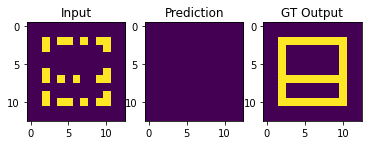

1652   2028
130   169
0.7692307692307693
Epoch:  1  Loss:  0.14808474183082582  Train-Accuracy:  0.814595660749507  Val Loss:  0.23077134788036346  Val-Accuracy:  0.7692307692307693


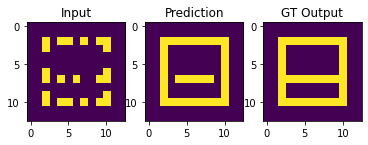

1953   2028
167   169
0.9881656804733728
Epoch:  501  Loss:  0.030520641431212425  Train-Accuracy:  0.9630177514792899  Val Loss:  0.015352071262896061  Val-Accuracy:  0.9881656804733728


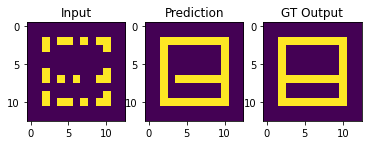

1970   2028
168   169
0.9940828402366864
Epoch:  1001  Loss:  0.023802613466978075  Train-Accuracy:  0.9714003944773175  Val Loss:  0.012618077918887138  Val-Accuracy:  0.9940828402366864


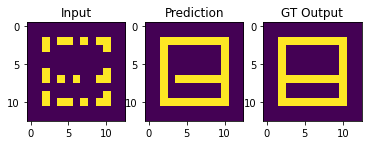

1969   2028
168   169
1.0
Epoch:  1501  Loss:  0.0237141665071249  Train-Accuracy:  0.9709072978303748  Val Loss:  0.01319876778870821  Val-Accuracy:  0.9940828402366864


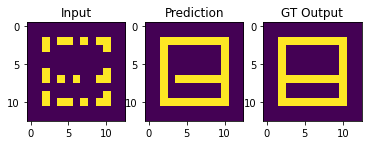

1966   2028
168   169
1.0
Epoch:  2001  Loss:  0.023983477056026457  Train-Accuracy:  0.9694280078895463  Val Loss:  0.01286417804658413  Val-Accuracy:  0.9940828402366864


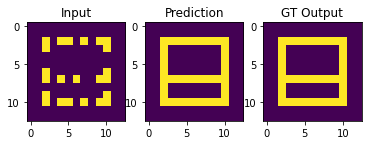

1948   2028
169   169
1.0
Epoch:  2501  Loss:  0.03005511686205864  Train-Accuracy:  0.960552268244576  Val Loss:  0.012317460030317307  Val-Accuracy:  1.0


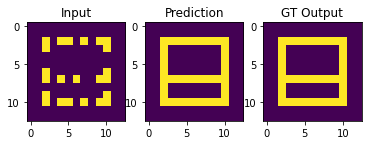

1969   2028
169   169
1.0
Epoch:  3001  Loss:  0.022888020426034928  Train-Accuracy:  0.9709072978303748  Val Loss:  0.01486041396856308  Val-Accuracy:  1.0


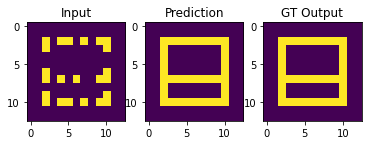

1974   2028
169   169
1.0
Epoch:  3501  Loss:  0.02362530305981636  Train-Accuracy:  0.9733727810650887  Val Loss:  0.014321754686534405  Val-Accuracy:  1.0


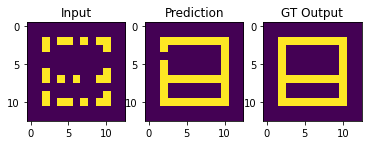

1951   2028
168   169
1.0
Epoch:  4001  Loss:  0.029792571812868117  Train-Accuracy:  0.9620315581854043  Val Loss:  0.015750708058476448  Val-Accuracy:  0.9940828402366864


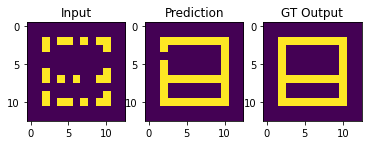

1948   2028
168   169
1.0
Epoch:  4501  Loss:  0.029016977176070213  Train-Accuracy:  0.960552268244576  Val Loss:  0.014756988734006882  Val-Accuracy:  0.9940828402366864


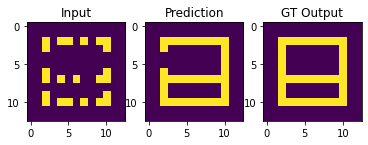

1972   2028
167   169
1.0
Epoch:  5001  Loss:  0.021375050768256187  Train-Accuracy:  0.9723865877712031  Val Loss:  0.017209438607096672  Val-Accuracy:  0.9881656804733728


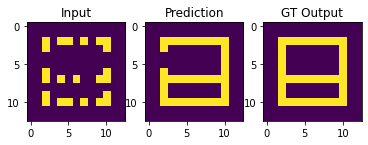

1979   2028
167   169
1.0
Epoch:  5501  Loss:  0.019443781673908235  Train-Accuracy:  0.9758382642998028  Val Loss:  0.016514111310243607  Val-Accuracy:  0.9881656804733728


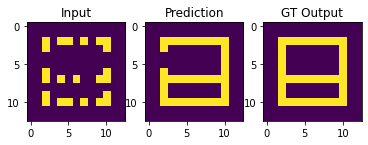

1971   2028
167   169
1.0
Epoch:  6001  Loss:  0.023252440616488457  Train-Accuracy:  0.9718934911242604  Val Loss:  0.015206849202513695  Val-Accuracy:  0.9881656804733728


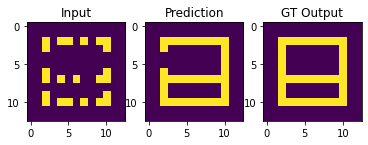

1958   2028
167   169
1.0
Epoch:  6501  Loss:  0.02601185366511345  Train-Accuracy:  0.965483234714004  Val Loss:  0.016931969672441483  Val-Accuracy:  0.9881656804733728


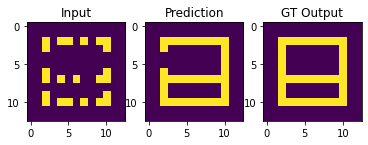

1965   2028
167   169
1.0
Epoch:  7001  Loss:  0.024460609629750253  Train-Accuracy:  0.9689349112426036  Val Loss:  0.01657378301024437  Val-Accuracy:  0.9881656804733728


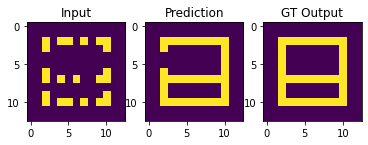

1975   2028
167   169
1.0
Epoch:  7501  Loss:  0.021405532583594324  Train-Accuracy:  0.9738658777120316  Val Loss:  0.01740572601556778  Val-Accuracy:  0.9881656804733728


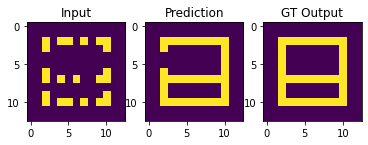

1965   2028
167   169
1.0
Epoch:  8001  Loss:  0.025232366845011713  Train-Accuracy:  0.9689349112426036  Val Loss:  0.016388308256864548  Val-Accuracy:  0.9881656804733728


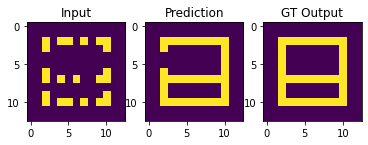

1958   2028
167   169
1.0
Epoch:  8501  Loss:  0.02497682049870491  Train-Accuracy:  0.965483234714004  Val Loss:  0.016835996881127357  Val-Accuracy:  0.9881656804733728


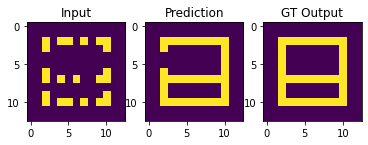

1974   2028
167   169
1.0
Epoch:  9001  Loss:  0.020742674171924592  Train-Accuracy:  0.9733727810650887  Val Loss:  0.016897549852728844  Val-Accuracy:  0.9881656804733728


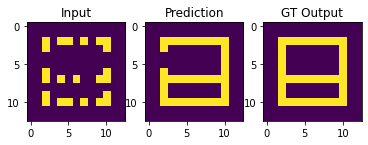

1950   2028
167   169
1.0
Epoch:  9501  Loss:  0.026402410864830018  Train-Accuracy:  0.9615384615384616  Val Loss:  0.01818433217704296  Val-Accuracy:  0.9881656804733728
Finished Training


In [78]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0
    total_loss = 0.0
    model.train()
    num_batches = 1

    for i, data in enumerate(trainloader, 0):
        optimizer.zero_grad()

        inputs, outputs = data
        preds = model(inputs)
        # print(preds)
        # preds = torch.round(preds)
        # print(preds)
        # print(inputs)
        # print(outputs)
        # break
        
        batch_correct, batch_total = get_accuracy(inputs, outputs, torch.round(preds))
        correct += batch_correct
        total += batch_total
        loss = criterion(outputs.view(outputs.size(0), -1), preds.view(preds.size(0), -1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_loss += running_loss
        num_batches += 1
        running_loss = 0.0
    # break
    val_correct = 0
    val_total = 0
    val_batches = 0
    val_total_loss = 0.0
    model.eval()
    with torch.no_grad():
      for i, data in enumerate(valloader, 0):
        inputs, outputs = data
        preds = model(inputs)
        if epoch%print_every == 0:
          preview(inputs, outputs, torch.round(preds))
        # preds = torch.round(preds)
        # if epoch%print_every == 0:
          # preview(inputs, outputs, preds)
        batch_correct, batch_total = get_accuracy(inputs, outputs, torch.round(preds))
        # batch_correct, batch_total = get_accuracy(inputs, outputs, preds)
        val_correct += batch_correct
        val_total += batch_total
        val_batches += 1
        val_loss = criterion(outputs.view(outputs.size(0), -1), preds.view(preds.size(0), -1))
        val_total_loss += val_loss.detach().numpy()
        
    if val_correct/val_total > highest_val:
      highest_val = val_correct/val_total
    if epoch % print_every == 0:
      print(correct," ",total)
      print(val_correct," ",val_total)
      print(highest_val)
      print("Epoch: ",epoch+1," Loss: ",total_loss/num_batches," Train-Accuracy: ", correct/total," Val Loss: ",val_total_loss/val_batches," Val-Accuracy: ",val_correct/val_total)
      
    

print('Finished Training')

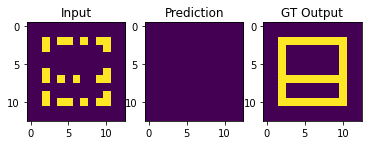

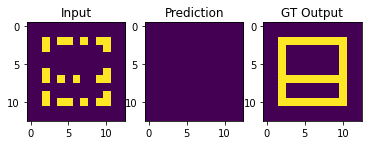

In [32]:
import matplotlib.pyplot as plt
def post_process(data):
  data = data.detach().numpy()
  data = np.reshape(data, newshape=[data.shape[2], data.shape[3]])
  return data

def preview(inputs, outputs, preds):
    inputs = post_process(inputs)
    preds = post_process(preds)
    outputs = post_process(outputs)
    plt.subplot(1,3,1)
    plt.imshow(inputs)
    plt.title("Input")
    plt.subplot(1,3,2)
    plt.imshow(preds)
    plt.title("Prediction")
    plt.subplot(1,3,3)
    plt.imshow(outputs)
    plt.title("GT Output")
    plt.show()


model.eval()
with torch.no_grad():
  for i, data in enumerate(valloader, 0):
    inputs, outputs = data
    preds = model(inputs)
    preview(inputs, outputs, preds)
    preview(inputs, outputs, torch.round(preds))

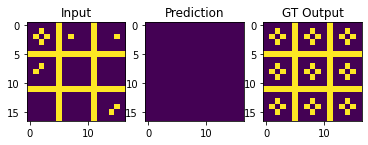

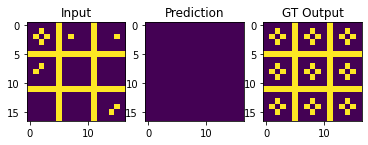

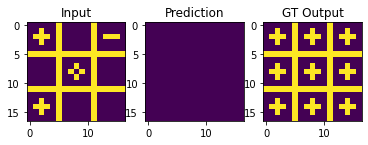

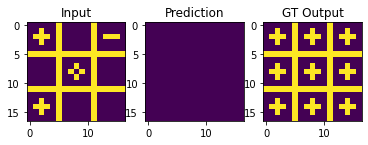

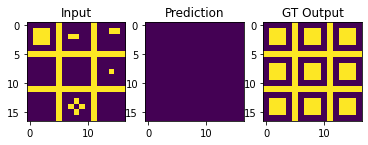

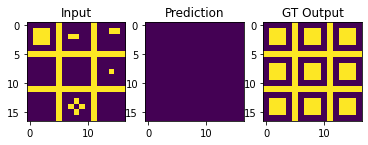

In [18]:
import matplotlib.pyplot as plt
def post_process(data):
  data = data.detach().numpy()
  data = np.reshape(data, newshape=[data.shape[2], data.shape[3]])
  return data

def preview(inputs, outputs, preds):
    inputs = post_process(inputs)
    preds = post_process(preds)
    outputs = post_process(outputs)
    plt.subplot(1,3,1)
    plt.imshow(inputs)
    plt.title("Input")
    plt.subplot(1,3,2)
    plt.imshow(preds)
    plt.title("Prediction")
    plt.subplot(1,3,3)
    plt.imshow(outputs)
    plt.title("GT Output")
    plt.show()


model.eval()
with torch.no_grad():
  for i, data in enumerate(trainloader, 0):
    inputs, outputs = data
    preds = model(inputs)
    for i in range(inputs.size(0)):
      preview(inputs[i:i+1], outputs[i:i+1], preds[i:i+1])
      preview(inputs[i:i+1], outputs[i:i+1], torch.round(preds[i:i+1]))